In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../../lib/')
from frustration_graph import *
import pickle
import os
import copy
import time
import os

In [2]:
def wall(lattice, n=4):
    """
    Find the perimeter of objects in binary images.
    A pixel is part of an object perimeter if its value is one and there
    is at least one zero-valued pixel in its neighborhood.
    By default the neighborhood of a pixel is 4 nearest pixels, but
    if `n` is set to 8 the 8 nearest pixels will be considered.
    Parameters
    ----------
      lattice : A boolean image with values -1 or 1
      n : Connectivity. Must be 4 or 8 (default: 8)
    Returns
    -------
      perim : A boolean image
    """
    
    lattice[lattice == -1] = 0  # convert -ones into zeros

    if n not in (4,8):
        raise ValueError('contour: n must be 4 or 8')
    rows,cols = lattice.shape

    # Translate image by one pixel in all directions
    north = np.zeros((rows,cols))
    south = np.zeros((rows,cols))
    west = np.zeros((rows,cols))
    east = np.zeros((rows,cols))

    north[:-1,:] = lattice[1:,:]
    south[1:,:]  = lattice[:-1,:]
    west[:,:-1]  = lattice[:,1:]
    east[:,1:]   = lattice[:,:-1]
    idx = (north == lattice) & \
          (south == lattice) & \
          (west  == lattice) & \
          (east  == lattice)
    if n == 8:
        north_east = np.zeros((rows, cols))
        north_west = np.zeros((rows, cols))
        south_east = np.zeros((rows, cols))
        south_west = np.zeros((rows, cols))
        north_east[:-1, 1:]   = lattice[1:, :-1]
        north_west[:-1, :-1] = lattice[1:, 1:]
        south_east[1:, 1:]     = lattice[:-1, :-1]
        south_west[1:, :-1]   = lattice[:-1, 1:]
        idx &= (north_east == lattice) & \
               (south_east == lattice) & \
               (south_west == lattice) & \
               (north_west == lattice)

    return (~idx) * lattice

In [14]:
def wall1(lattice):
    L = lattice.shape[0]
    contour = np.zeros(lattice.shape)
    wl=0
    for i in range (L):
        for j in range (L):
            s = lattice[i, j]
            right = lattice[(i + 1)%L, j]
            up = lattice[i, (j + 1)%L]
            if right != s:
                contour[(i + 1)%L, j] = 1
                wl += 1
            if up != s:
                contour[i, (j + 1)%L] = 1
                wl += 1
    return wl, contour

In [7]:
x = y = np.arange(0, 10)
mask = (x[np.newaxis, :] - 5)**2 + (y[:, np.newaxis] - 5)**2 < 3**2

In [8]:
lattice = np.zeros((10, 10))

lattice[mask] = 1

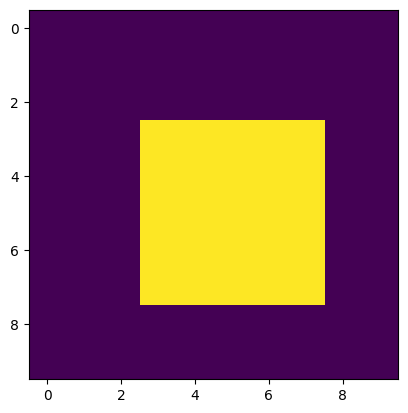

In [9]:
plt.imshow(lattice)

In [31]:
contour = wall(~lattice.astype("bool"), 8)

In [32]:
per, contour1 = wall1(lattice)

In [33]:
np.sum(contour), per

(60, 20)

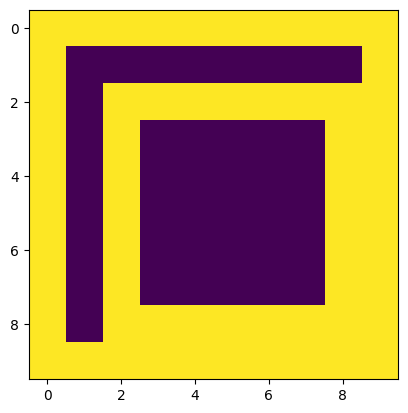

In [34]:
plt.imshow(contour)

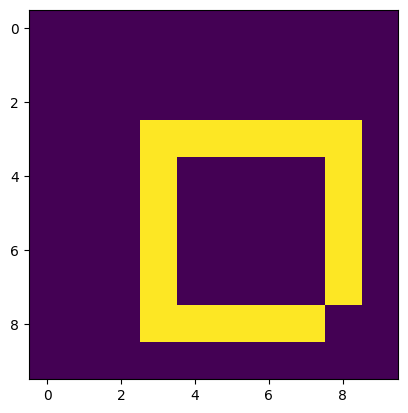

In [35]:
plt.imshow(contour1)